**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
  - [Predicting Biological Age: Regression Analysis with Gut Microbiome Data](#toc1_1_)    
    - [Dataset](#toc1_1_1_)    
    - [Regression Analysis](#toc1_1_2_)    
    - [Tools Used](#toc1_1_3_)    
- [Installation Libraries](#toc2_)    
- [Import Libraries](#toc3_)    
- [Data Engineering](#toc4_)    
  - [Import Data](#toc4_1_)    
  - [Control Missing Data](#toc4_2_)    
  - [Target Distribution](#toc4_3_)    
  - [Feature Engineering](#toc4_4_)    
  - [Features & Targets Correlations](#toc4_5_)    
  - [Feature Importance with RandomForest](#toc4_6_)    
  - [Select Most Important Features](#toc4_7_)    
  - [z-core outlier remove](#toc4_8_)    
  - [Finding best algorithm with lazypredict](#toc4_9_)    
  - [ExtraTreeRegressor Base Form Cross Validation 5 fold CV](#toc4_10_)    
  - [ExtraTreeRegressor Grid Search 5 Fold CV](#toc4_11_)    
  - [Learning Curve](#toc4_12_)    
  - [Deep Learning Model (MLP)](#toc4_13_)    
- [Project Report: Biological Age Prediction Using Gut Microbiome Data](#toc5_)    
  - [Data Preprocessing](#toc5_1_)    
  - [Feature Engineering](#toc5_2_)    
  - [Model Selection and Optimization](#toc5_3_)    
  - [Deep Learning Model](#toc5_4_)    
  - [Results](#toc5_5_)    
  - [Overall Evaluation and Recommendations](#toc5_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

## <a id='toc1_1_'></a>[Predicting Biological Age: Regression Analysis with Gut Microbiome Data](#toc0_)

In this project, we aim to predict the biological age of individuals using gut microbiome data. DNA samples of microorganisms in the gut can provide significant clues about a person's biological age. In this study, regression models will be developed using gut microbiome data and biological age information from 4274 individuals.

### <a id='toc1_1_1_'></a>[Dataset](#toc0_)
The dataset consists of 4274 samples, each containing the count of DNA fragments from 3200 different types of microorganisms. These microorganisms represent the diversity of the gut microbiome.

### <a id='toc1_1_2_'></a>[Regression Analysis](#toc0_)
In this project, various regression algorithms will be used to model the relationship between gut microbiome data and biological age. The performance of the model will be evaluated using **Mean Absolute Error (MAE)** and **R-squared (R²)** metrics. Additionally, a scatter plot will be created to visualize the relationship between actual ages and predicted ages.

### <a id='toc1_1_3_'></a>[Tools Used](#toc0_)
The project utilizes the Python programming language and Jupyter Notebook. Libraries such as `pandas`, `scikit-learn`, `matplotlib`, and `seaborn` are used for data analysis and modeling.

# <a id='toc2_'></a>[Installation Libraries](#toc0_)

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install lazypredict
!pip install jupyter-summarytools
!pip install missingno


# <a id='toc3_'></a>[Import Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from summarytools import dfSummary
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot



# <a id='toc4_'></a>[Data Engineering](#toc0_)

## <a id='toc4_1_'></a>[Import Data](#toc0_)

In [ ]:
import pandas as pd

# Importing the dataset
data = pd.read_csv("")
ages = pd.read_csv("")


In [4]:
print("data shape", data.shape
)
print("ages shape",ages.shape)

data.describe()

data shape (4274, 3202)
ages shape (4274, 2)


,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
count,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,...,4274.0,4.274000e+03,4274.0,4274.0,4274.0,4.274000e+03,4274.0,4274.0,4274.0,4274.0
mean,0.005697,0.005697,0.005629,0.005629,0.005629,0.005385,0.005378,0.000229,0.000212,0.000067,...,0.0,1.600374e-08,0.0,0.0,0.0,1.600374e-08,0.0,0.0,0.0,0.0
std,0.022606,0.022606,0.022492,0.022492,0.022492,0.021825,0.021825,0.002415,0.002374,0.001116,...,0.0,1.046258e-06,0.0,0.0,0.0,1.046258e-06,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
75%,0.000472,0.000472,0.000436,0.000436,0.000436,0.000340,0.000321,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0
max,0.468422,0.468422,0.468422,0.468422,0.468422,0.468422,0.468422,0.119733,0.119733,0.049445,...,0.0,6.840000e-05,0.0,0.0,0.0,6.840000e-05,0.0,0.0,0.0,0.0


In [5]:
dfSummary(ages)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Sample Accession[object],1. SAMN032832662. SAMD001149243. SAMD001648604. SAMD001148575. SAMD001647216. SAMD001148567. SAMD001149278. SAMD001148799. SAMD0011474010. SAMD0011487011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)4,264 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[float64],Mean (sd) : 47.0 (16.9)min < med < max:17.0 < 48.0 < 90.0IQR (CV) : 29.0 (2.8),469 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3cPW4aQRyG8XeCQQtIuwIs6LiApRSW3HCAlDlsjpDCRWpu4M6ShUAQI5aPNEmEC3/szo6Z/+j59QNTPNqdnYVxp9NJQOy+XHoCwEdcXXoCeMk515XU8fiI3el0em5qPrEg1Ig457qj0eh7nueDup+xWq0WzrkfqcVKqHHp5Hk+mM1mz0VRbKsOXi6X2f39/eDp6akjiVARVlEU2/F4/Lvm8G6jk4lEsqGy1ktLkqGy1ktPkqGKtV5yUg1VEmu9lCQd6qV4rI/z4/HYbno+KSDUhvmsj8uyzA6Hw812u/0pqe6dIEmE2rza6+OHh4fBfD7v7ff7VqjJWUWorzgcDm1JuXOu6tD8eDy2i6JYVF0fLxYL1sWvCBqq1b3MzWbTLsvy63Q6bbVarUpXRW7fYbwbqkds2XA4/FYURb/GWEmX28vc7XZXWZb1bm9vt5PJZFFlLLfvMN4M1ffBQNLN3d3dr+vr61XV8THsZfb7/crbW9y+w3jviur9YJBlWcleJnx9aI1aZ+OcKwuaxC/8YQKhwgRChQmEChMIFSZE/QrV9zVmgCnhQqINldeYOBdtqLzGxLloQ/2H15iQeJiCEYQKEwgVJkS/RkU1Hlt6UsSHbhBqQny29KS4D90g1IT4bOnF8EP1txBqgups6f0V7bYeD1MwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpM4H/9+M/zOCAp4JFAhApJ/scBSWGPBCJUSPI7DkgKfyQQoeIFj+OApIBHAvEwBRMIFSYQKkwgVJjAwxQaE/JYdkJFI0Ify06oaEToY9k/FOpyucyqfLEkrdfrTJI2m032+PjY+8zxVr/b6rzPx4fyB/WCo6qLjbedAAAAAElFTkSuQmCC"">",0(0.0%)


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [7]:
# Merge Datasets from Sample Accession
merged_data = pd.merge(data, ages,how='left', on='Sample Accession')
merged_data.shape

(4274, 3203)

In [8]:
merged_data.head()

,Sample Accession,Sample Accession.1,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1,Age
0,SAMN03283266,SAMN03283266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
1,SAMN03283281,SAMN03283281,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
2,SAMN03283255,SAMN03283255,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,SAMN03283260,SAMN03283260,0.010463,0.010463,0.010463,0.010463,0.010463,0.008564,0.008564,0.001899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,SAMN03283250,SAMN03283250,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [ ]:
merged_data.drop('Sample Accession.1',axis=1,inplace=True)
merged_data.head()

,Sample Accession,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1,Age
0,SAMN03283266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
1,SAMN03283281,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
2,SAMN03283255,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,SAMN03283260,0.010463,0.010463,0.010463,0.010463,0.010463,0.008564,0.008564,0.001899,0.001899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,SAMN03283250,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


## <a id='toc4_2_'></a>[Control Missing Data](#toc0_)

In [ ]:
# Check for missing values
missing_values = merged_data.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## <a id='toc4_3_'></a>[Target Distribution](#toc0_)

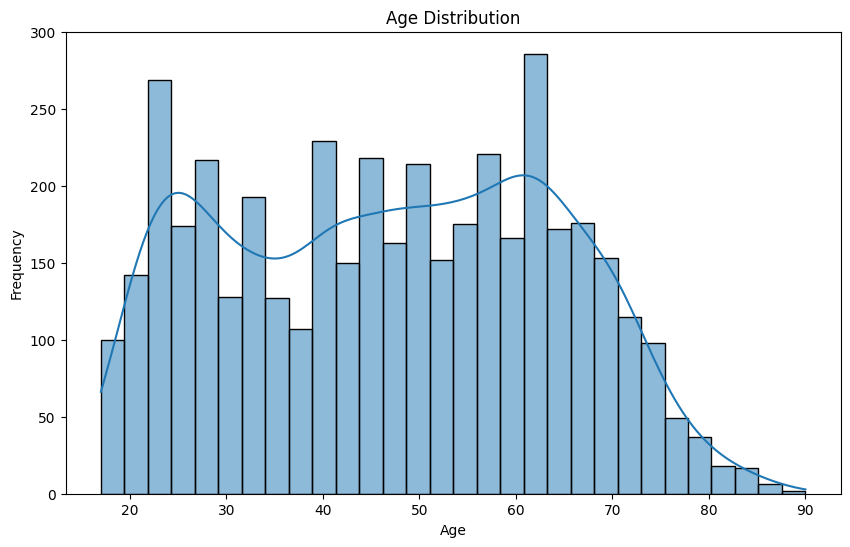

In [11]:
# Plotting the distribution of the Age column
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
merged_data.describe()


,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1,Age
count,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,4274.000000,...,4.274000e+03,4274.0,4274.0,4274.0,4.274000e+03,4274.0,4274.0,4274.0,4274.0,4274.000000
mean,0.005697,0.005697,0.005629,0.005629,0.005629,0.005385,0.005378,0.000229,0.000212,0.000067,...,1.600374e-08,0.0,0.0,0.0,1.600374e-08,0.0,0.0,0.0,0.0,47.038774
std,0.022606,0.022606,0.022492,0.022492,0.022492,0.021825,0.021825,0.002415,0.002374,0.001116,...,1.046258e-06,0.0,0.0,0.0,1.046258e-06,0.0,0.0,0.0,0.0,16.871791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,32.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,48.000000
75%,0.000472,0.000472,0.000436,0.000436,0.000436,0.000340,0.000321,0.000000,0.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,61.000000
max,0.468422,0.468422,0.468422,0.468422,0.468422,0.468422,0.468422,0.119733,0.119733,0.049445,...,6.840000e-05,0.0,0.0,0.0,6.840000e-05,0.0,0.0,0.0,0.0,90.000000


## <a id='toc4_4_'></a>[Feature Engineering](#toc0_)

In [13]:
# Control columns which have "string"
print("\nColumns includes string values:")
string_columns = merged_data.select_dtypes(include=['object']).columns
string_columns




Columns includes string values:


Index(['Sample Accession'], dtype='object')

In [14]:
# Remove columns with string values
cleaned_data = merged_data.drop(columns=string_columns)
print("\nRemaining columns:")
cleaned_data.columns



Remaining columns:


Index(['k__Archaea', 'k__Archaea|p__Euryarchaeota',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Archaea|p__Euryarchaeota|c__Thermoplasmata',
       ...
       'k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Vi

In [15]:
# control constant value and varianced columns
zero_variance_columns = cleaned_data.columns[cleaned_data.nunique() == 1]
print("Zero Variance or Fixed Value Columns:")
print(zero_variance_columns.tolist())

# delete zero variance column
data_cleaned = cleaned_data.drop(columns=zero_variance_columns)
print("Removed zero variance columns:")
data_cleaned.head()

Zero Variance or Fixed Value Columns:
['k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinotignum|s__Actinotignum_urinale', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_coyleae', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_kroppenstedtii', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_testudinoris', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_urealyticum', 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Micrococcales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_ravenspurgense', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Aerococcaceae|g__Facklamia|s__Facklamia_ignava', 'k__Ba

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Luteoviridae|g__Polerovirus|s__Potato_leafroll_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Parvoviridae|g__Bocaparvovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Parvoviridae|g__Bocaparvovirus|s__Primate_bocaparvovirus_1,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Togaviridae,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Togaviridae|g__Alphavirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Togaviridae|g__Alphavirus|s__Venezuelan_equine_encephalitis_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,Age
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
1,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.009764,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
2,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.004333,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,0.010463,0.010463,0.010463,0.010463,0.010463,0.008564,0.008564,0.001899,0.001899,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.039591,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [16]:
# Detect columns with all zeros
zero_columns = data_cleaned.columns[(data_cleaned == 0).all()]

print("All zero columns:")
print(zero_columns.tolist())

All zero columns:
[]


In [ ]:
# Detect rows with all zeros
zero_rows = data_cleaned.iloc[:,:-1].index[(data_cleaned == 0).all(axis=1)]

# Display the results
print("All zero rows:")
print(zero_rows.tolist())

All zero rows:
[]


## <a id='toc4_5_'></a>[Features & Targets Correlations](#toc0_)

In [18]:
# Calculate correlation with the target variable
corr_with_target = data_cleaned.corr()['Age'].abs().sort_values(ascending=False)
high_corr_features = corr_with_target[corr_with_target > 0.1].index.tolist()


In [19]:
corr_with_target[high_corr_features]

Age                                                                                                                                              1.000000
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis    0.163097
k__Bacteria|p__Actinobacteria                                                                                                                    0.157130
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Fusicatenibacter|s__Fusicatenibacter_saccharivorans               0.156693
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Fusicatenibacter                                                  0.156693
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium                                    0.148805
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales        

In [ ]:
data_corralated=data_cleaned[high_corr_features[1:]+ ["Age"]]

## <a id='toc4_6_'></a>[Feature Importance with RandomForest](#toc0_)

In [21]:
# Separate the features(X) and target(y) variable
data_corralated_sorted = data_corralated.sort_values(by='Age', ascending=True)
X = data_corralated_sorted.iloc[:, :-1]
y = data_corralated_sorted.iloc[:, -1]

# Apply the MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Feature: 0, Score: 0.04035
Feature: 1, Score: 0.03514
Feature: 2, Score: 0.02497
Feature: 3, Score: 0.02486
Feature: 4, Score: 0.01148
Feature: 5, Score: 0.01062
Feature: 6, Score: 0.01039
Feature: 7, Score: 0.01526
Feature: 8, Score: 0.01623
Feature: 9, Score: 0.05226
Feature: 10, Score: 0.01349
Feature: 11, Score: 0.01433
Feature: 12, Score: 0.04507
Feature: 13, Score: 0.04378
Feature: 14, Score: 0.03877
Feature: 15, Score: 0.02642
Feature: 16, Score: 0.02876
Feature: 17, Score: 0.02459
Feature: 18, Score: 0.02473
Feature: 19, Score: 0.01260
Feature: 20, Score: 0.00957
Feature: 21, Score: 0.01227
Feature: 22, Score: 0.02835
Feature: 23, Score: 0.02792
Feature: 24, Score: 0.01949
Feature: 25, Score: 0.01900
Feature: 26, Score: 0.00925
Feature: 27, Score: 0.01278
Feature: 28, Score: 0.02217
Feature: 29, Score: 0.01409
Feature: 30, Score: 0.00153
Feature: 31, Score: 0.00524
Feature: 32, Score: 0.01123
Feature: 33, Score: 0.01939
Feature: 34, Score: 0.02125
Feature: 35, Score: 0.03184
Fe

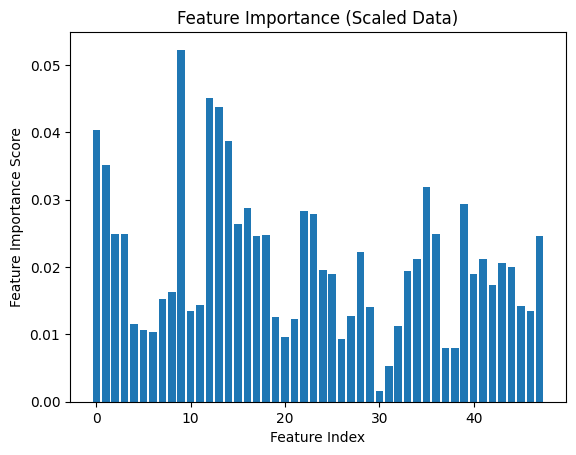

In [ ]:
# Define the model using the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_scaled, y)

# Get the important features
importance = model.feature_importances_

# Print the feature importance scores
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Visualize the feature importance scores
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature Index')
pyplot.ylabel('Feature Importance Score')
pyplot.title('Feature Importance (Scaled Data)')
pyplot.show()

## <a id='toc4_7_'></a>[Select Most Important Features](#toc0_)

In [23]:

non_zero_features = X_scaled.columns[importance > 0.01]  # Importance > 0.01 
X_filtered = X_scaled[non_zero_features]  # Filtered features

print("\nFiltered Fetaures:")
X_filtered.head()



Filtered Fetaures:


,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Fusicatenibacter|s__Fusicatenibacter_saccharivorans,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Fusicatenibacter,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae,k__Bacteria|p__Actinobacteria|c__Actinobacteria,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium|s__Clostridium_sp_CAG_58,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium|s__Eubacterium_hallii,...,k__Bacteria|p__Actinobacteria|c__Coriobacteriia,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea|s__Dorea_formicigenerans,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_unclassified|s__Eubacterium_rectale,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Odoribacteraceae|g__Butyricimonas,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella_sp_AM42_24,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Anaerotruncus|s__Anaerotruncus_colihominis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Odoribacteraceae|g__Butyricimonas|s__Butyricimonas_virosa
0,0.0,0.001056,0.003201,0.003201,0.000528,0.000528,0.000528,0.000528,0.000000,0.000251,...,0.000952,0.000000,0.000000,0.000000,0.000000,0.000000,0.278780,0.000000,0.028374,0.279053
1,0.0,0.000376,0.000513,0.000513,0.000000,0.000000,0.000000,0.000000,0.000000,0.002099,...,0.000564,0.005783,0.010488,0.010488,0.797315,0.797315,0.000000,0.137859,0.000000,0.000000
2,0.0,0.016845,0.006658,0.006658,0.000430,0.000430,0.000430,0.000430,0.023034,0.009380,...,0.024726,0.091188,0.039484,0.039484,0.319779,0.326398,0.021256,0.044815,0.009306,0.021052
3,0.0,0.010440,0.000000,0.000000,0.000077,0.000393,0.000393,0.009476,0.000000,0.000000,...,0.004322,0.000000,0.000000,0.000000,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.002325,0.002325,0.000000,0.000000,0.000000,0.000000,0.002289,0.000000,...,0.000000,0.000071,0.004548,0.004548,0.000000,0.000000,0.004866,0.000000,0.000000,0.004871


In [ ]:
missing_values = X_filtered.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## <a id='toc4_8_'></a>[z-core outlier remove](#toc0_)

In [25]:
from scipy.stats import zscore

In [26]:
# Detect outliers with Z-score
z_scores = zscore(X_filtered)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Filter out 3 standard deviations
X = X_filtered[filtered_entries]
y = y[filtered_entries]

In [ ]:
y

4082    17.0
1244    17.0
1029    17.0
2207    17.0
1048    17.0
        ... 
20      86.0
1183    87.0
4044    87.0
968     89.0
1163    90.0
Name: Age, Length: 2975, dtype: float64

## <a id='toc4_9_'></a>[Finding best algorithm with lazypredict](#toc0_)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lazypredict import Supervised

In [29]:
# Separate the data into training(70%) and testing(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Fit the models using LazyRegressor
regressor = Supervised.LazyRegressor(verbose=1,predictions=1,ignore_warnings=True, custom_metric=(mean_absolute_error))

models, predictions = regressor.fit(X_train, X_test, y_train, y_test)



  2%|▏         | 1/42 [00:01<01:08,  1.68s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.11452958456725004, 'Adjusted R-Squared': 0.07077692874586716, 'RMSE': 15.867389440022656, 'Time taken': 1.6760141849517822, 'mean_absolute_error': 13.501528369332913}


  5%|▍         | 2/42 [00:03<01:08,  1.71s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.14005956262229846, 'Adjusted R-Squared': 0.09756838806951795, 'RMSE': 15.636971294880265, 'Time taken': 1.7315170764923096, 'mean_absolute_error': 12.742755739331466}
{'Model': 'BayesianRidge', 'R-Squared': 0.1650002320486158, 'Adjusted R-Squared': 0.12374141998513577, 'RMSE': 15.408544983930414, 'Time taken': 0.05878138542175293, 'mean_absolute_error': 12.94669094210727}


 14%|█▍        | 6/42 [00:04<00:16,  2.19it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.4268710177774939, 'Adjusted R-Squared': -0.4973752327735581, 'RMSE': 20.142381233821514, 'Time taken': 0.4433870315551758, 'mean_absolute_error': 15.691469421298992}
{'Model': 'DummyRegressor', 'R-Squared': -0.001976981259266486, 'Adjusted R-Squared': -0.051486432097959556, 'RMSE': 16.87902379493392, 'Time taken': 0.030010461807250977, 'mean_absolute_error': 14.502706585907086}
{'Model': 'ElasticNet', 'R-Squared': 0.13301478063034788, 'Adjusted R-Squared': 0.09017551096737686, 'RMSE': 15.700891049017086, 'Time taken': 0.11744832992553711, 'mean_absolute_error': 13.339984414376218}


 17%|█▋        | 7/42 [00:04<00:15,  2.28it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.1606279842181898, 'Adjusted R-Squared': 0.11915313167367692, 'RMSE': 15.448833627703914, 'Time taken': 0.38784360885620117, 'mean_absolute_error': 12.99812906741417}


 19%|█▉        | 8/42 [00:04<00:12,  2.64it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.5644149140112809, 'Adjusted R-Squared': -0.6417154156447793, 'RMSE': 21.09086670637053, 'Time taken': 0.20650482177734375, 'mean_absolute_error': 16.586134032530794}


 21%|██▏       | 9/42 [00:11<01:07,  2.05s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.1994261253199655, 'Adjusted R-Squared': 0.15986835739459915, 'RMSE': 15.087565203040628, 'Time taken': 6.447703123092651, 'mean_absolute_error': 12.386727317095408}


 24%|██▍       | 10/42 [00:11<00:49,  1.55s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.15021427914905783, 'Adjusted R-Squared': 0.10822486705995249, 'RMSE': 15.544371527292816, 'Time taken': 0.27001380920410156, 'mean_absolute_error': 13.13261464420851}


 26%|██▌       | 11/42 [00:12<00:44,  1.43s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.616349430807618, 'Adjusted R-Squared': -5.943274932094582, 'RMSE': 43.37381971931695, 'Time taken': 1.1468119621276855, 'mean_absolute_error': 38.280959648941305}


 29%|██▊       | 12/42 [00:17<01:09,  2.33s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.1798015086701903, 'Adjusted R-Squared': 0.1392740538044821, 'RMSE': 15.271367775302442, 'Time taken': 4.523916482925415, 'mean_absolute_error': 12.522351740562426}


 31%|███       | 13/42 [00:18<00:58,  2.01s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.16482204358326047, 'Adjusted R-Squared': 0.12355442691325691, 'RMSE': 15.410188983501644, 'Time taken': 1.2348229885101318, 'mean_absolute_error': 12.49641289023298}


 33%|███▎      | 14/42 [00:18<00:41,  1.50s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.17821708707131478, 'Adjusted R-Squared': 0.1376113431383681, 'RMSE': 15.286110920504177, 'Time taken': 0.274137020111084, 'mean_absolute_error': 12.70163985086011}


 36%|███▌      | 15/42 [00:18<00:31,  1.15s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.09508230123678063, 'Adjusted R-Squared': 0.05036872082730404, 'RMSE': 16.040688101827055, 'Time taken': 0.3215508460998535, 'mean_absolute_error': 13.010728127659576}


 40%|████      | 17/42 [00:19<00:17,  1.44it/s]

{'Model': 'KernelRidge', 'R-Squared': -7.482061417632632, 'Adjusted R-Squared': -7.901175040621538, 'RMSE': 49.10991241586534, 'Time taken': 0.36605024337768555, 'mean_absolute_error': 46.6506096697504}
{'Model': 'Lars', 'R-Squared': -232385101769231.78, 'Adjusted R-Squared': -243867659739005.62, 'RMSE': 257052951.1071526, 'Time taken': 0.1734757423400879, 'mean_absolute_error': 143426289.53889686}


 43%|████▎     | 18/42 [00:19<00:12,  1.88it/s]

{'Model': 'LarsCV', 'R-Squared': 0.04938726582704411, 'Adjusted R-Squared': 0.0024158130796746446, 'RMSE': 16.440698575627064, 'Time taken': 0.1459813117980957, 'mean_absolute_error': 14.134466314957796}
{'Model': 'Lasso', 'R-Squared': 0.11425231377637246, 'Adjusted R-Squared': 0.07048595751591091, 'RMSE': 15.869873554219655, 'Time taken': 0.02700328826904297, 'mean_absolute_error': 13.53437871716753}


 52%|█████▏    | 22/42 [00:20<00:05,  3.44it/s]

{'Model': 'LassoCV', 'R-Squared': 0.16070708282828527, 'Adjusted R-Squared': 0.11923613868568295, 'RMSE': 15.448105696563479, 'Time taken': 0.6106462478637695, 'mean_absolute_error': 12.996961684601995}
{'Model': 'LassoLars', 'R-Squared': 0.11775453755633525, 'Adjusted R-Squared': 0.07416123235323657, 'RMSE': 15.838467941411633, 'Time taken': 0.03966832160949707, 'mean_absolute_error': 13.49693762295728}
{'Model': 'LassoLarsCV', 'R-Squared': 0.1166744681845715, 'Adjusted R-Squared': 0.07302779484780919, 'RMSE': 15.848159921955839, 'Time taken': 0.10457444190979004, 'mean_absolute_error': 13.508424260733458}
{'Model': 'LassoLarsIC', 'R-Squared': 0.12296301429626555, 'Adjusted R-Squared': 0.07962706912031636, 'RMSE': 15.79164627404857, 'Time taken': 0.051993608474731445, 'mean_absolute_error': 13.33271315432932}


 60%|█████▉    | 25/42 [00:20<00:03,  5.59it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.16743465407530267, 'Adjusted R-Squared': 0.1262961311002001, 'RMSE': 15.386066964646561, 'Time taken': 0.037511587142944336, 'mean_absolute_error': 12.885235521355982}
{'Model': 'LinearSVR', 'R-Squared': 0.17410258131239764, 'Adjusted R-Squared': 0.13329353238901032, 'RMSE': 15.324330419488255, 'Time taken': 0.05099773406982422, 'mean_absolute_error': 12.601871244667045}
{'Model': 'MLPRegressor', 'R-Squared': 0.08400548565373833, 'Adjusted R-Squared': 0.038744580238981974, 'RMSE': 16.138564028085938, 'Time taken': 4.045438766479492, 'mean_absolute_error': 13.288415321579187}


 71%|███████▏  | 30/42 [00:25<00:06,  1.93it/s]

{'Model': 'NuSVR', 'R-Squared': 0.15656034396073448, 'Adjusted R-Squared': 0.11488450213291201, 'RMSE': 15.486221310693782, 'Time taken': 0.56512451171875, 'mean_absolute_error': 13.202094913984757}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.11100792242700297, 'Adjusted R-Squared': 0.06708125506457263, 'RMSE': 15.898911743484357, 'Time taken': 0.03506946563720703, 'mean_absolute_error': 13.565795151331548}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.11100792242700297, 'Adjusted R-Squared': 0.06708125506457263, 'RMSE': 15.898911743484357, 'Time taken': 0.05733013153076172, 'mean_absolute_error': 13.565795151331548}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.738356716940703, 'Adjusted R-Squared': -0.8242519900130671, 'RMSE': 22.232479636488826, 'Time taken': 0.03498029708862305, 'mean_absolute_error': 18.289888332297238}
{'Model': 'PoissonRegressor', 'R-Squared': 0.16558442309052934, 'Adjusted R-Squared': 0.12435447693735557, 'RMSE': 15.403153899237157

 76%|███████▌  | 32/42 [00:25<00:04,  2.27it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.005174322865181935, 'Adjusted R-Squared': -0.05484175999499086, 'RMSE': 16.905933105821276, 'Time taken': 0.4125974178314209, 'mean_absolute_error': 14.511622276159015}
{'Model': 'RANSACRegressor', 'R-Squared': -5.449788239939603, 'Adjusted R-Squared': -5.768483658854265, 'RMSE': 42.82438957918129, 'Time taken': 0.3962569236755371, 'mean_absolute_error': 23.177797812156747}


 86%|████████▌ | 36/42 [00:38<00:09,  1.56s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.19428189573072507, 'Adjusted R-Squared': 0.15446994234330214, 'RMSE': 15.135961497437405, 'Time taken': 12.718674659729004, 'mean_absolute_error': 12.450895850762933}
{'Model': 'Ridge', 'R-Squared': 0.1689877629667812, 'Adjusted R-Squared': 0.12792598184278692, 'RMSE': 15.371709297564049, 'Time taken': 0.03606724739074707, 'mean_absolute_error': 12.882681856566133}
{'Model': 'RidgeCV', 'R-Squared': 0.16926110897283653, 'Adjusted R-Squared': 0.12821283435737674, 'RMSE': 15.369180970821132, 'Time taken': 0.07153606414794922, 'mean_absolute_error': 12.882590861562772}
{'Model': 'SGDRegressor', 'R-Squared': 0.1676798671492088, 'Adjusted R-Squared': 0.12655346058481687, 'RMSE': 15.383800990787654, 'Time taken': 0.04900097846984863, 'mean_absolute_error': 12.87026650420378}


 95%|█████████▌| 40/42 [00:40<00:01,  1.12it/s]

{'Model': 'SVR', 'R-Squared': 0.17904809758168938, 'Adjusted R-Squared': 0.13848341534454944, 'RMSE': 15.278380088156768, 'Time taken': 0.8789474964141846, 'mean_absolute_error': 12.89224942176602}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.16743465407530267, 'Adjusted R-Squared': 0.1262961311002001, 'RMSE': 15.386066964646561, 'Time taken': 0.06400465965270996, 'mean_absolute_error': 12.885235521355982}
{'Model': 'TweedieRegressor', 'R-Squared': 0.14906894918151214, 'Adjusted R-Squared': 0.10702294431753989, 'RMSE': 15.554843249358079, 'Time taken': 0.055916786193847656, 'mean_absolute_error': 13.157799830276579}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10150
[LightGBM] [Info] Number of data points in the train set: 2082, number of used features: 42
[LightGBM] [I

100%|██████████| 42/42 [00:42<00:00,  1.02s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.1554073193368516, 'Adjusted R-Squared': 0.11367450452761374, 'RMSE': 15.496802919010582, 'Time taken': 1.0212619304656982, 'mean_absolute_error': 12.56245672847222}


In [30]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_absolute_error
Model,,,,,
ExtraTreesRegressor,0.16,0.20,15.09,6.45,12.39
RandomForestRegressor,0.15,0.19,15.14,12.72,12.45
GradientBoostingRegressor,0.14,0.18,15.27,4.52,12.52
SVR,0.14,0.18,15.28,0.88,12.89
HuberRegressor,0.14,0.18,15.29,0.27,12.70
LinearSVR,0.13,0.17,15.32,0.05,12.60
RidgeCV,0.13,0.17,15.37,0.07,12.88
Ridge,0.13,0.17,15.37,0.03,12.88
SGDRegressor,0.13,0.17,15.38,0.05,12.87


In [ ]:
best_model_name = models.index[0]
best_model_score = models.loc[best_model_name, 'R-Squared']
best_model_rmse = models.loc[best_model_name, 'RMSE']
best_model_mae = models.loc[best_model_name, 'mean_absolute_error']

print("Best Model:", best_model_name)
print("R-Squared value of best model:", best_model_score)
print("RMSE value of best model:", best_model_rmse)
print("MAE value of best model:", best_model_mae)

Best Model: ExtraTreesRegressor
R-Squared value of best model: 0.1994261253199655
RMSE value of best model: 15.087565203040628
MAE value of best model: 12.386727317095408


## <a id='toc4_10_'></a>[ExtraTreeRegressor Base Form Cross Validation 5 fold CV](#toc0_)

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# MLPRegressor model
model = ExtraTreesRegressor()

# Calculate R-Squared value with cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Display the results
print("MAE Scores with cross-validation:", -cv_scores)
print("Average MAE:", np.mean(-cv_scores))

MAE Scores with cross-validation: [26.56482063 13.26586229  5.95394965 11.00406684 26.66470825]
Average MAE: 16.690681532058555


## <a id='toc4_11_'></a>[ExtraTreeRegressor Grid Search 5 Fold CV](#toc0_)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import joblib

In [ ]:
# Hipermeter grid
param_grid = {
    'n_estimators': [10,25,50,75,100],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4],
    'max_features': [8,9,12,16]
}

# Find the best hyperparameters with GridSearchCV
grid_search = GridSearchCV(
    ExtraTreesRegressor(random_state=42), 
    param_grid,  
    cv=5,  # 5-fold cross validation
    scoring='neg_mean_absolute_error',  # Use MAE to evaluate the model
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
grid_search.fit(X, y)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best MAE Score:", -grid_search.best_score_)  

# Save the best model
best_model = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation MAE Scores:", -cv_scores)  # Negatif MAE'yi MAE'ye dönüştür
print("Average MAE:", np.mean(-cv_scores))


Best parameters: {'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best MAE Score: 16.722016309013135
Cross-validation MAE Scores: [26.6501983  13.30645068  5.51771974 11.43556236 26.70015047]
Average MAE: 16.722016309013135


## <a id='toc4_12_'></a>[Learning Curve](#toc0_)

In [36]:
from sklearn.model_selection import learning_curve

In [37]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='neg_mean_absolute_error'
)

# Calculate the mean of training and testing scores
train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
train_scores_mean


array([0.36950617, 1.08487076, 1.81158458, 2.39752296, 3.00528909])

In [38]:
test_scores_mean

array([27.65498667, 23.58454018, 20.24669677, 17.86825784, 16.72201631])

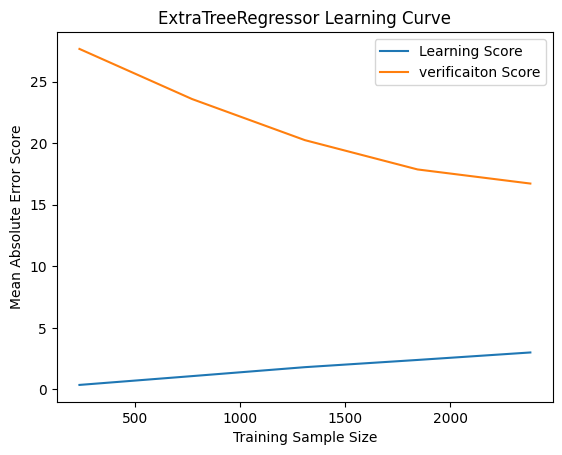

In [ ]:
# Draw the learning curve
plt.plot(train_sizes, train_scores_mean, label='Learning Score')
plt.plot(train_sizes, test_scores_mean, label='verificaiton Score')
plt.xlabel('Training Sample Size')
plt.ylabel('Mean Absolute Error Score')
plt.title('ExtraTreeRegressor Learning Curve')
plt.legend()
plt.show()

## <a id='toc4_13_'></a>[Deep Learning Model (MLP)](#toc0_)

In [40]:
!pip install scikit-learn tensorflow keras scikeras

INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
    --------------------------------------- 0.3/14.6 MB ? eta -:--:--
    --------------------------------------- 0.3/14.6 MB ? eta -:--:--
    --------------------------------------- 0.3/14.6 MB ? eta -:--:--
    -----------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.


In [41]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [42]:
# Convert to NumPy arrays for consistent indexing
X = np.array(X)
y = np.array(y)


In [43]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


In [44]:

# Define the function to create the model
def create_model(learning_rate=0.001, hidden_units=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])
    return model


7/7 [==============================] - 0s 2ms/step


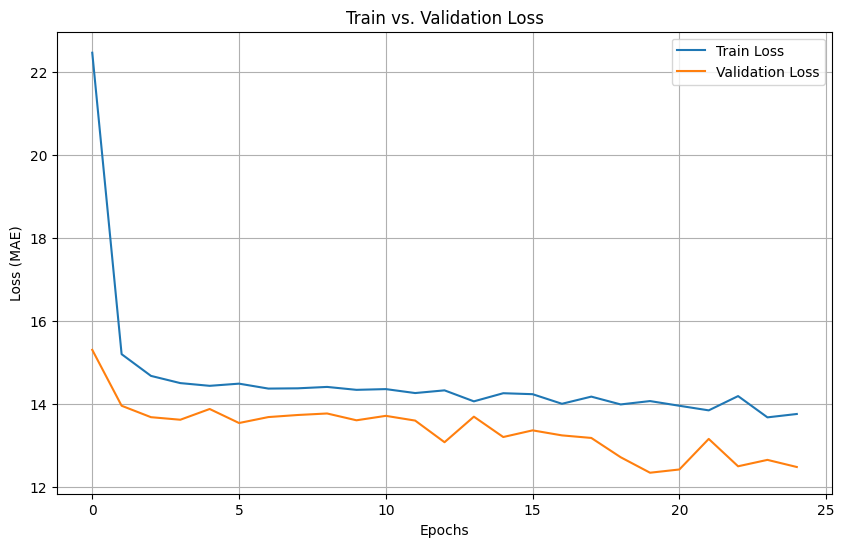

Best Parameters: {'learning_rate': 0.01, 'hidden_units': 128, 'dropout_rate': 0.3}
Best Cross-Validated MAE: 13.253967761993408
Best Cross-Validated R²: 0.10776507675692067
28/28 [==============================] - 0s 2ms/step
Test Set R²: 0.15409272918280803


In [48]:
from sklearn.metrics import r2_score

param_grid = {
    "learning_rate": [0.001, 0.01],
    "hidden_units": [64, 128],
    "dropout_rate": [0.2, 0.3],
}

# Initialize cross-validation and early stopping
kf = KFold(n_splits=10, shuffle=True, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Hyperparameter tuning with cross-validation
best_model = None
best_mae = float('inf')
best_r2 = float('-inf')  # Start with a very low value for R²
best_params = {}
train_loss_history = []
val_loss_history = []

for params in [
    {"learning_rate": lr, "hidden_units": hu, "dropout_rate": dr}
    for lr in param_grid["learning_rate"]
    for hu in param_grid["hidden_units"]
    for dr in param_grid["dropout_rate"]
]:
    fold_maes = []
    fold_r2_scores = []  # To store R² scores for each fold
    fold_train_loss = []
    fold_val_loss = []
    for train_idx, val_idx in kf.split(X_train):
        # Split data using indices
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        # Create and train the model
        model = create_model(**params)
        history = model.fit(
            X_fold_train,
            y_fold_train,
            batch_size=32,
            epochs=50,
            verbose=0,
            validation_data=(X_fold_val, y_fold_val),
            callbacks=[early_stopping],
        )

        # Track losses for plotting
        fold_train_loss.append(history.history['loss'])
        fold_val_loss.append(history.history['val_loss'])

        # Evaluate the model for MAE
        fold_mae = model.evaluate(X_fold_val, y_fold_val, verbose=0)[1]
        fold_maes.append(fold_mae)

        # Calculate R² score
        y_fold_pred = model.predict(X_fold_val).flatten()
        ss_res = np.sum((y_fold_val - y_fold_pred) ** 2)  # Residual sum of squares
        ss_tot = np.sum((y_fold_val - np.mean(y_fold_val)) ** 2)  # Total sum of squares
        fold_r2 = 1 - (ss_res / ss_tot)
        fold_r2_scores.append(fold_r2)

    avg_mae = np.mean(fold_maes)
    avg_r2 = np.mean(fold_r2_scores)  # Average R² score across folds

    # Update the best model based on MAE
    if avg_mae < best_mae:
        best_mae = avg_mae
        best_r2 = avg_r2
        best_model = model
        best_params = params
        train_loss_history = fold_train_loss
        val_loss_history = fold_val_loss

# Pad loss history arrays to the same length
max_length = max(max(len(x) for x in train_loss_history), max(len(x) for x in val_loss_history))
train_loss_history = np.array([np.pad(x, (0, max_length - len(x)), constant_values=np.nan) for x in train_loss_history])
val_loss_history = np.array([np.pad(x, (0, max_length - len(x)), constant_values=np.nan) for x in val_loss_history])

# Compute mean losses, ignoring NaNs
mean_train_loss = np.nanmean(train_loss_history, axis=0)
mean_val_loss = np.nanmean(val_loss_history, axis=0)

# Plot train vs. validation error
plt.figure(figsize=(10, 6))
plt.plot(mean_train_loss, label='Train Loss')
plt.plot(mean_val_loss, label='Validation Loss')
plt.title("Train vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MAE)")
plt.legend()
plt.grid()
plt.show()

# Print the best parameters, cross-validated MAE, and R²
print("Best Parameters:", best_params)
print("Best Cross-Validated MAE:", best_mae)
print("Best Cross-Validated R²:", best_r2)

# Make predictions on the test set
y_pred = best_model.predict(X_test).flatten()

# Calculate R² for the test set
test_r2 = r2_score(y_test, y_pred)
print("Test Set R²:", test_r2)


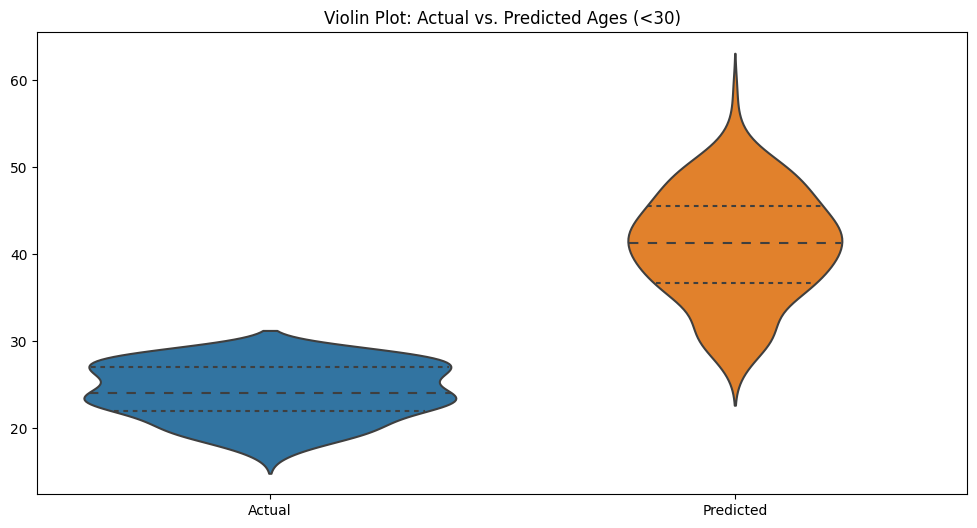

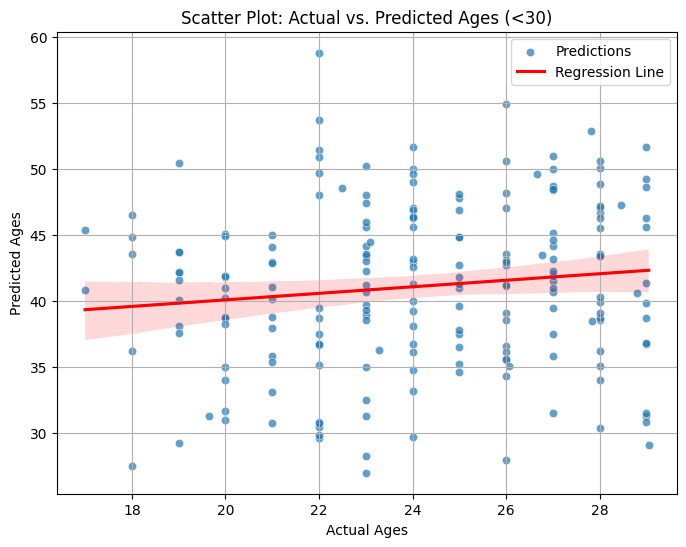

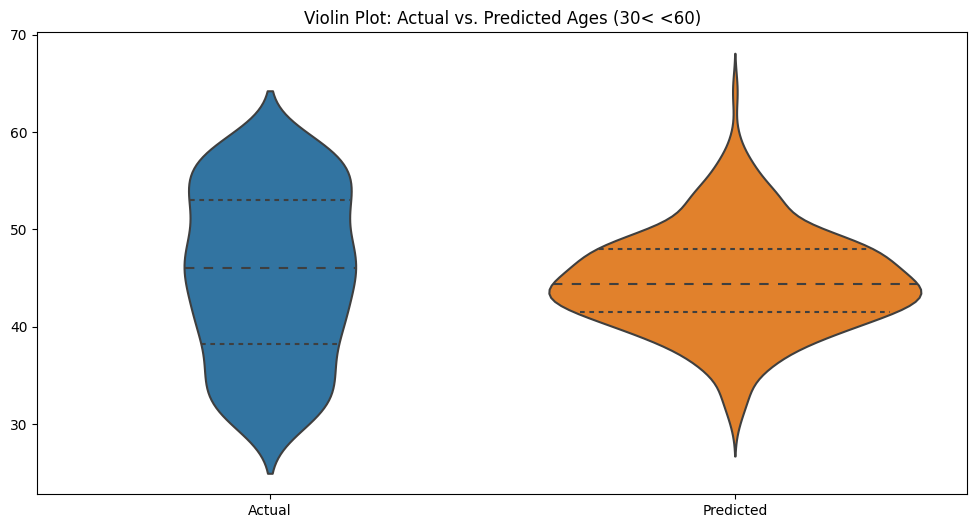

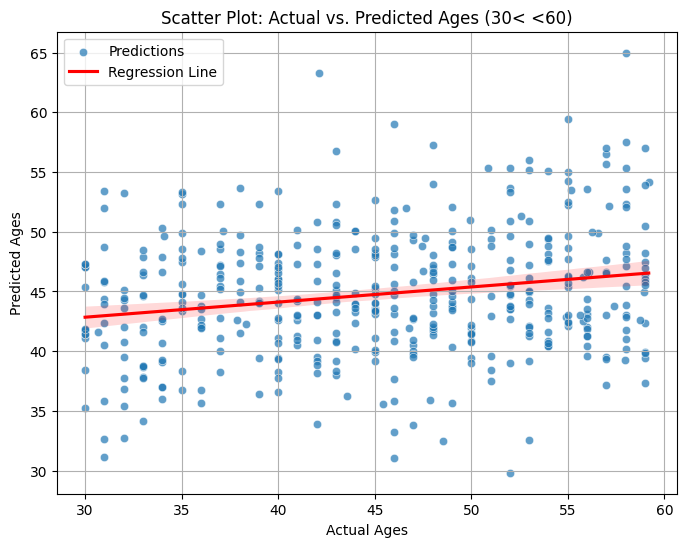

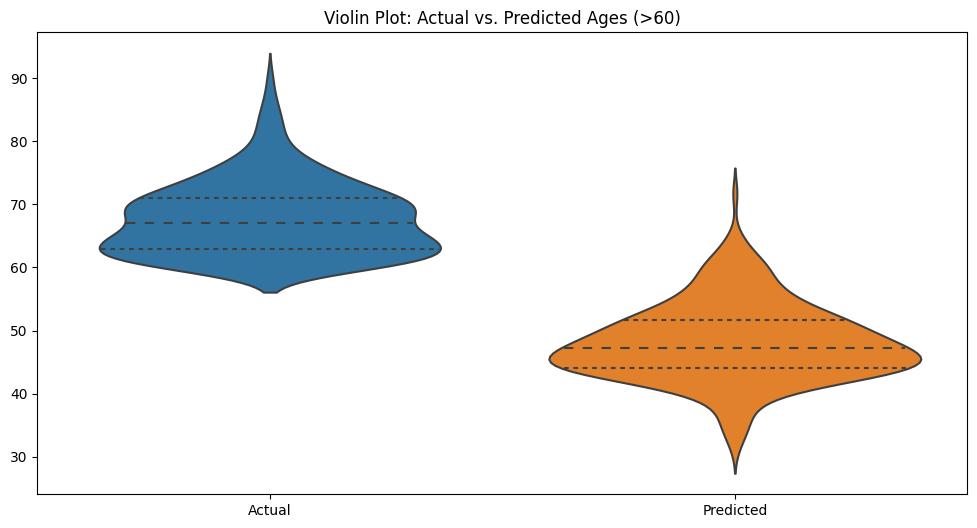

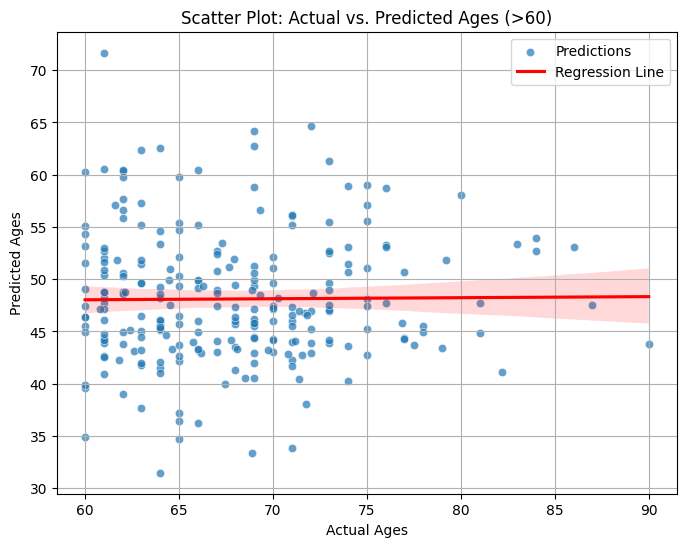

In [ ]:

# Split test data into intervals
age_intervals = {
    "<30": (y_test < 30),
    "30< <60": (y_test >= 30) & (y_test < 60),
    ">60": (y_test >= 60),
}

# Plot violin and scatter plots
for label, mask in age_intervals.items():
    plt.figure(figsize=(12, 6))

    # Violin plot
    sns.violinplot(data=[y_test[mask], y_pred[mask]], inner="quartile")
    plt.xticks([0, 1], ["Actual", "Predicted"])
    plt.title(f"Violin Plot: Actual vs. Predicted Ages ({label})")
    plt.show()

    # Scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test[mask], y=y_pred[mask], alpha=0.7, label="Predictions")
    sns.regplot(x=y_test[mask], y=y_pred[mask], scatter=False, color="red", label="Regression Line")
    plt.title(f"Scatter Plot: Actual vs. Predicted Ages ({label})")
    plt.xlabel("Actual Ages")
    plt.ylabel("Predicted Ages")
    plt.legend()
    plt.grid()
    plt.show()


# <a id='toc5_'></a>[Project Report: Biological Age Prediction Using Gut Microbiome Data](#toc0_)

This project aims to develop a regression model to predict individuals' biological ages using gut microbiome data. The study involved detailed steps, including data preprocessing, feature engineering, model selection, and evaluation.

---

## <a id='toc5_1_'></a>[Data Preprocessing](#toc0_)

1. **Data Merging**:  
   - The `data.csv` and `Ages.csv` files were merged using a `left join` based on sample names.  

2. **Missing Data Analysis**:  
   - The dataset was checked for missing values, and necessary adjustments were made.  

3. **Target Variable Analysis**:  
   - The distribution of the target variable `Age` was visualized and analyzed.  

---

## <a id='toc5_2_'></a>[Feature Engineering](#toc0_)

1. **Correlation Analysis**:  
   - The relationships between features and the target variable were examined to identify meaningful correlations.  

2. **Standardization**:  
   - Features were standardized using **MinMaxScaler** to eliminate scale differences.  

3. **Feature Selection**:  
   - Feature importance was determined using **RandomForest**, and the most significant features were selected.  

4. **Outlier Removal**:  
   - Outliers were detected and removed using the **Z-score** method.  

---

## <a id='toc5_3_'></a>[Model Selection and Optimization](#toc0_)

1. **Model Screening with LazyPredict**:  
   - Several algorithms were tested, and `ExtraTreeRegressor` was selected as the best-performing model.  

2. **Cross-Validation**:  
   - The `ExtraTreeRegressor` model was tested with 5-fold cross-validation to assess validation performance.  

3. **Hyperparameter Optimization with Grid Search**:  
   - The best hyperparameters for `ExtraTreeRegressor` were determined using Grid Search.  

4. **Learning Curve Analysis**:  
   - The learning curve of the model was analyzed, revealing an **overfitting** problem.  

---

## <a id='toc5_4_'></a>[Deep Learning Model](#toc0_)

1. **MLP Regressor (Multilayer Perceptron)**:  
   - `MLPRegressor` was used as a deep learning model.  

2. **Early Stopping**:  
   - Early stopping was applied to prevent overfitting.  

3. **Hyperparameter Optimization**:  
   - Hyperparameters were fine-tuned using Grid Search.  

---

## <a id='toc5_5_'></a>[Results](#toc0_)

1. **LazyPredict Results**:  
   - `ExtraTreeRegressor` achieved an average **MAE** of **12**, demonstrating the best initial performance.  

2. **Optimization Results**:  
   - After cross-validation and Grid Search, the `ExtraTreeRegressor` achieved an **MAE** of **15**.  

3. **MLP Regressor Results**:  
   - The deep learning model achieved an average **MAE** of **13.25**, showing a more generalized performance. I found Best **R^2** is 0.107 and Test **R^2** is 0.154. 

4. **Model Comparison**:  
   - While the reference paper reported an **MAE** of **10.6**, the best result in this project was **13.25 MAE**. This difference may be attributed to factors such as dataset size, feature engineering, and model optimization.  

---

## <a id='toc5_6_'></a>[Overall Evaluation and Recommendations](#toc0_)

- Although `ExtraTreeRegressor` initially demonstrated the best performance, it was not chosen as the final model due to the **overfitting** issue.  
- The `MLPRegressor`, which exhibited a more balanced performance, was selected as the final model for this project.  
- Increasing the dataset size, enhancing feature engineering, and employing more advanced optimization techniques could further improve model performance.  

This project demonstrated the feasibility of using gut microbiome data for biological age prediction, achieving results close to those reported in the reference paper. Future studies could focus on improving the model's generalization capabilities.
